In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Coffe_sales.csv")

In [5]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [ ]:
# convert to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_89494/4110331766.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


In [8]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,2025-10-15 10:15:50.520
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 12:19:22.539
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 12:20:18.089
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 13:46:33.006
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 13:48:14.626
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,2025-10-15 10:34:54.894
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-15 14:43:37.362
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-15 14:44:16.864
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-15 15:47:28.723


In [ ]:
df[df.duplicated()]

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time


In [14]:
df.isnull().any()

hour_of_day    False
cash_type      False
money          False
coffee_name    False
Time_of_Day    False
Weekday        False
Month_name     False
Weekdaysort    False
Monthsort      False
Date           False
Time           False
dtype: bool

In [ ]:
df["money"] = pd.to_numeric(df["money"], errors="coerce")

In [ ]:
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
month_order = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

df["Weekday"] = pd.Categorical(df["Weekday"], categories=weekday_order, ordered=True)
df["Month_name"] = pd.Categorical(
    df["Month_name"], categories=month_order, ordered=True
)

In [18]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,2025-10-15 10:15:50.520
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 12:19:22.539
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 12:20:18.089
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 13:46:33.006
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 13:48:14.626
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,2025-10-15 10:34:54.894
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-15 14:43:37.362
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-15 14:44:16.864
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-15 15:47:28.723


# Question 1 (Manager)
## Peak sales by time and weekday

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_89494/3616701885.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_sales = df.pivot_table(


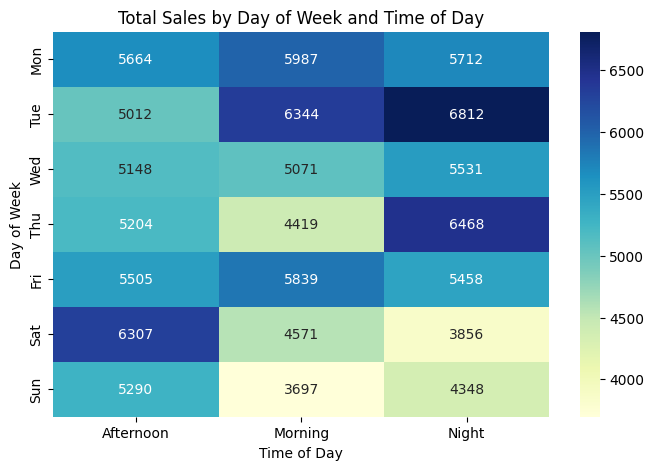

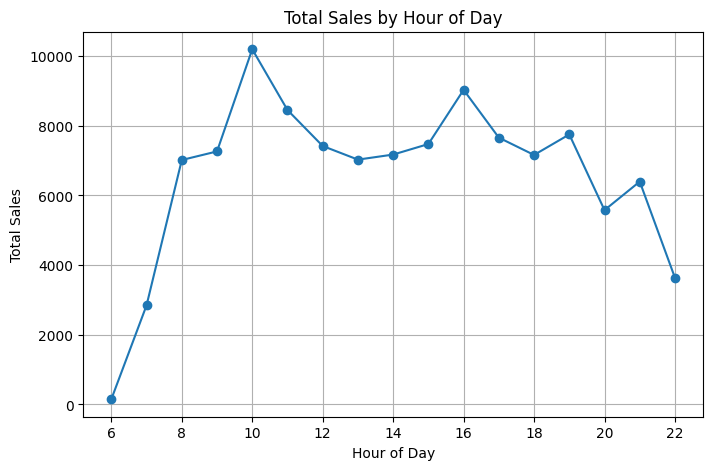

In [ ]:
pivot_sales = df.pivot_table(
    index="Weekday", columns="Time_of_Day", values="money", aggfunc="sum"
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Total Sales by Day of Week and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Day of Week")
plt.show()

# Hourly sales trend
hourly_sales = df.groupby("hour_of_day")["money"].sum()

plt.figure(figsize=(8, 5))
plt.plot(hourly_sales.index, hourly_sales.values, marker="o")
plt.title("Total Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

<Axes: xlabel='Weekday', ylabel='money'>

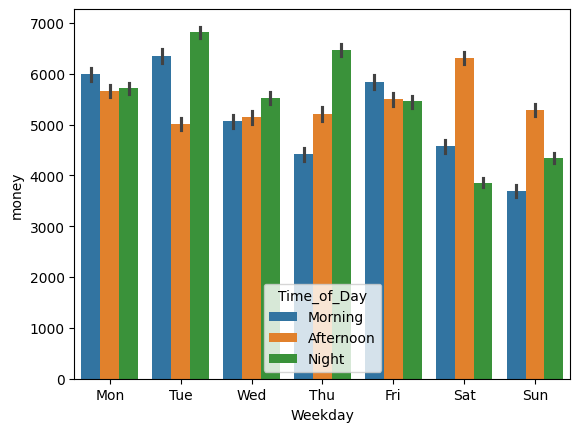

In [ ]:
# compare how mornings vs. afternoons perform across days.
sns.barplot(data=df, x="Weekday", y="money", hue="Time_of_Day", estimator="sum")

<Axes: xlabel='hour_of_day', ylabel='money'>

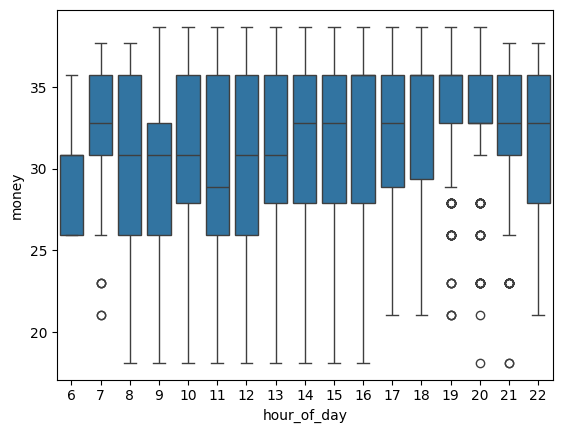

In [ ]:
# sales variability at different hours of the day.
sns.boxplot(data=df, x="hour_of_day", y="money")

<Axes: xlabel='hour_of_day', ylabel='Density'>

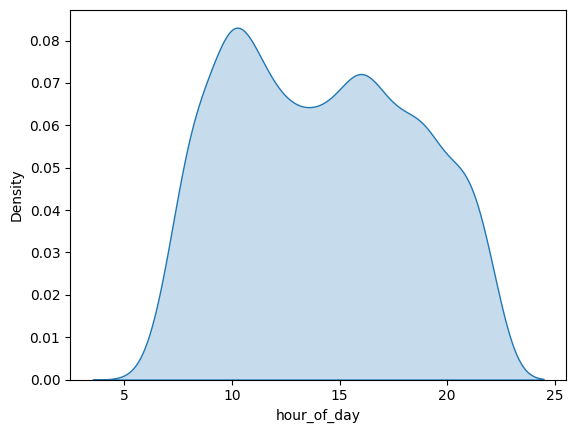

In [ ]:
# Density Plot (Customer Traffic Flow)
sns.kdeplot(data=df, x="hour_of_day", fill=True)

# Question 2 (Manager)
## Coffee preference by time of day

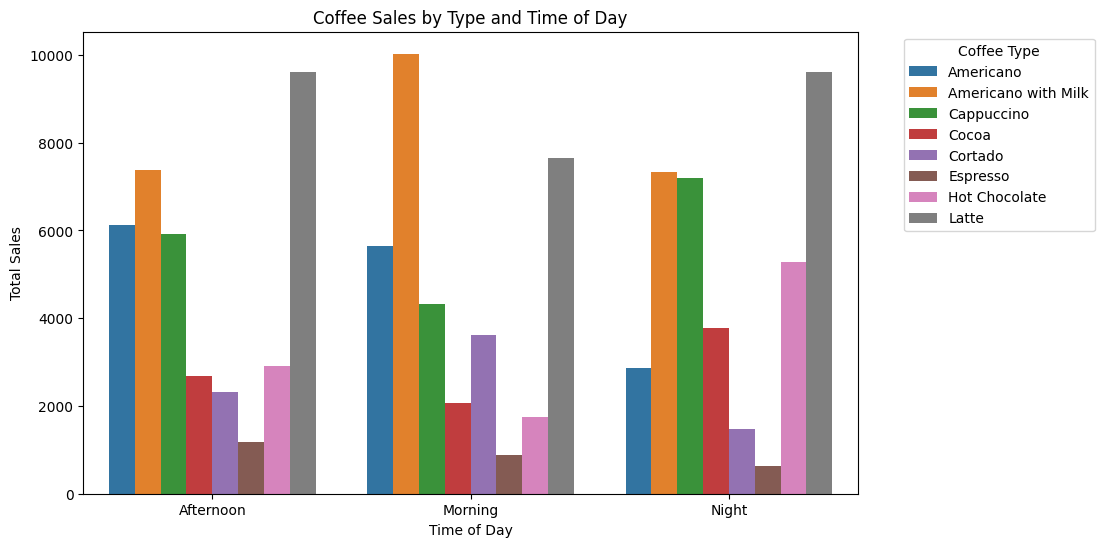

In [ ]:
coffee_time_sales = (
    df.groupby(["Time_of_Day", "coffee_name"])["money"].sum().reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_time_sales, x="Time_of_Day", y="money", hue="coffee_name")
plt.title("Coffee Sales by Type and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Sales")
plt.legend(title="Coffee Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Axes: xlabel='Time_of_Day', ylabel='coffee_name'>

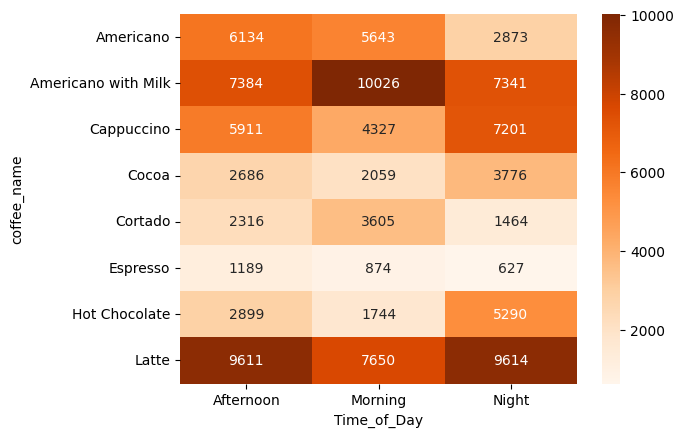

In [ ]:
# Heatmap of Coffee Type vs. Time of Day

coffee_heatmap = df.pivot_table(
    index="coffee_name", columns="Time_of_Day", values="money", aggfunc="sum"
)
sns.heatmap(coffee_heatmap, cmap="Oranges", annot=True, fmt=".0f")

<Axes: xlabel='Time_of_Day'>

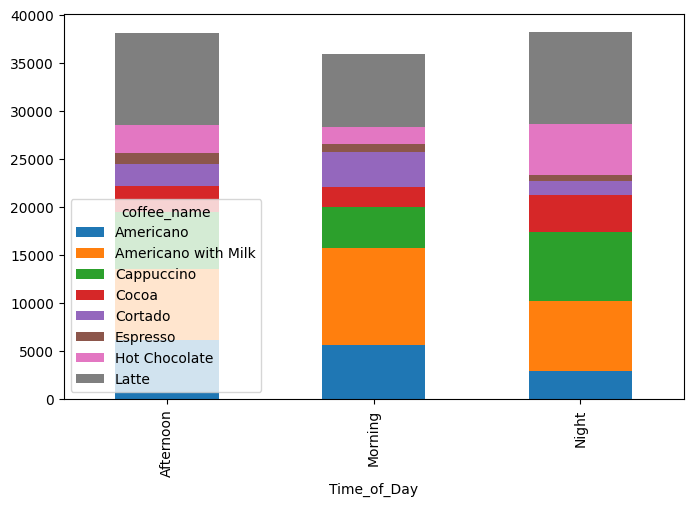

In [ ]:
# Proportions of each coffee type within morning, afternoon, evening.
coffee_mix = (
    df.groupby(["Time_of_Day", "coffee_name"])["money"].sum().unstack().fillna(0)
)
coffee_mix.plot(kind="bar", stacked=True, figsize=(8, 5))

# Question 3 (Owner/Investor)
## Monthly sales trends and averages

In [26]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,2025-10-15 10:15:50.520
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 12:19:22.539
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 12:20:18.089
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 13:46:33.006
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-15 13:48:14.626
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,2025-10-15 10:34:54.894
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-15 14:43:37.362
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-15 14:44:16.864
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-15 15:47:28.723


In [ ]:
monthly_summary = df.groupby("Month_name")["money"].agg(["sum", "mean"]).reset_index()

monthly_summary

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_89494/1625083487.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_summary = df.groupby('Month_name')['money'].agg(['sum','mean']).reset_index()


,Month_name,sum,mean
0,Jan,6398.86,31.835124
1,Feb,13215.48,31.242270
2,Mar,15891.64,32.169312
3,Apr,5719.56,34.045000
4,May,8164.42,33.877261
5,Jun,7617.76,34.160359
6,Jul,6915.94,29.181181
7,Aug,7613.84,27.992059
8,Sep,9988.64,29.036744
9,Oct,13891.16,32.608357


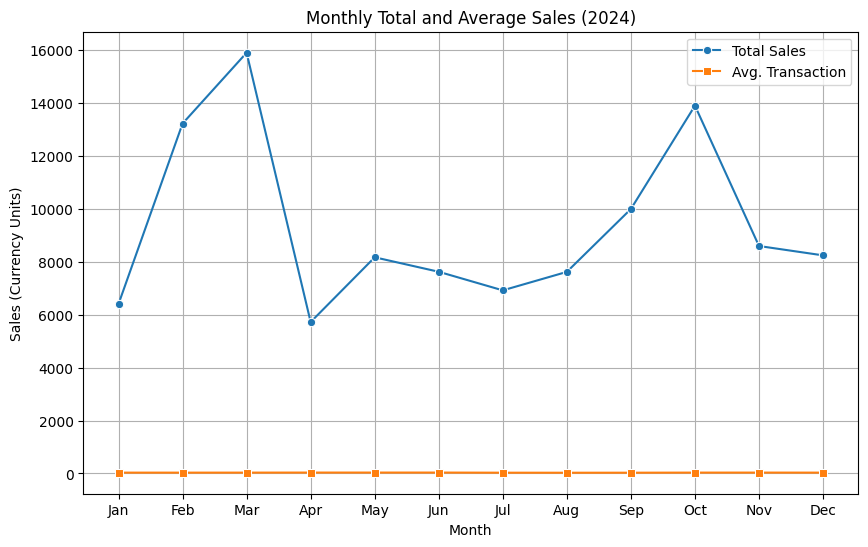

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=monthly_summary,
    x="Month_name",
    y="sum",
    marker="o",
    label="Total Sales",
    ax=ax1,
)
sns.lineplot(
    data=monthly_summary,
    x="Month_name",
    y="mean",
    marker="s",
    label="Avg. Transaction",
    ax=ax1,
)
plt.title("Monthly Total and Average Sales (2024)")
plt.xlabel("Month")
plt.ylabel("Sales (Currency Units)")
plt.legend()
plt.grid(True)
plt.show()

### Issue in the plot above is the fact that the transaction value is in $30 when the sums are so large. Need to find a way to address that if we go ahead with this approach

<Axes: xlabel='Month_name', ylabel='mean'>

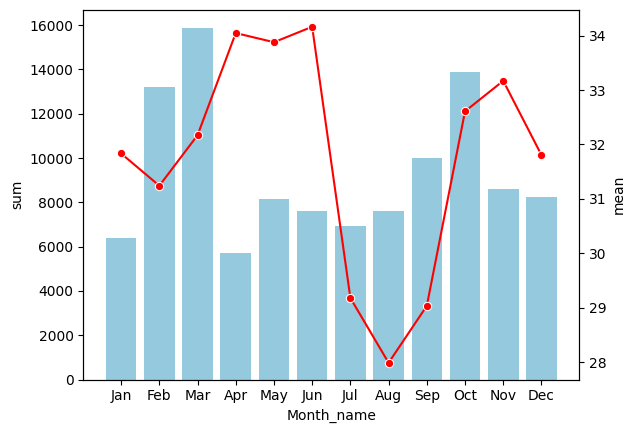

In [ ]:
"""
growth vs. spending per customer simultaneously.
The below graph is not good as we have 2 y axis. If we want to continue with this approacg we will need to find a different way of presentation based on her slides for multiple axises. Assitionally we would to have coffee name on the y axis and the Total sales on x
"""

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(data=monthly_summary, x="Month_name", y="sum", color="skyblue", ax=ax1)
sns.lineplot(
    data=monthly_summary, x="Month_name", y="mean", color="red", marker="o", ax=ax2
)

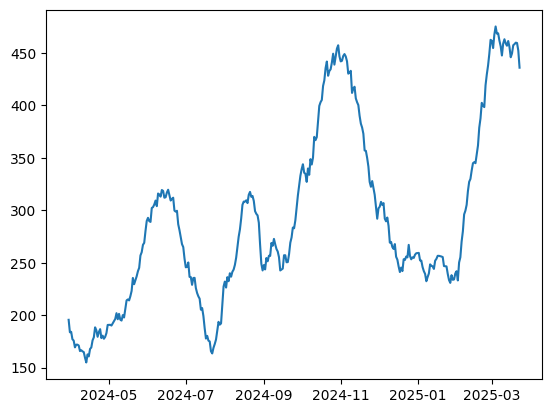

In [ ]:
# Rolling Average Line Chart
df_month = df.groupby("Date")["money"].sum().rolling(window=30).mean()
plt.plot(df_month.index, df_month.values)

<Axes: xlabel='Quarter', ylabel='money'>

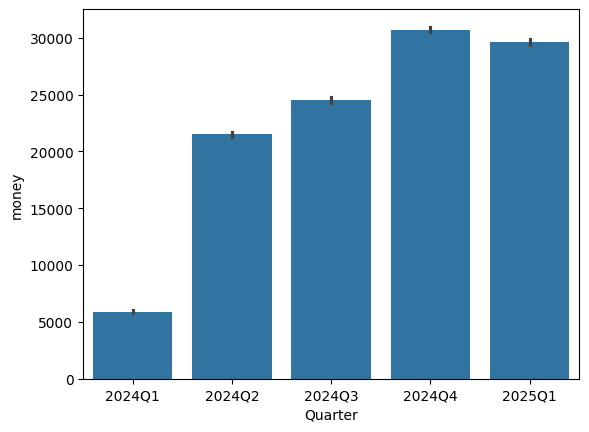

In [ ]:
# Seasonality Comparison Chart (Quarterly)
df["Quarter"] = df["Date"].dt.to_period("Q")
sns.barplot(data=df, x="Quarter", y="money", estimator="sum")

# Question 4 (Owner/Investor)
## Product contribution to revenue across months

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_89494/1637475210.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coffee_month_sales = df.groupby(['Month_name', 'coffee_name'])['money'].sum().reset_index()


<Figure size 1200x600 with 0 Axes>

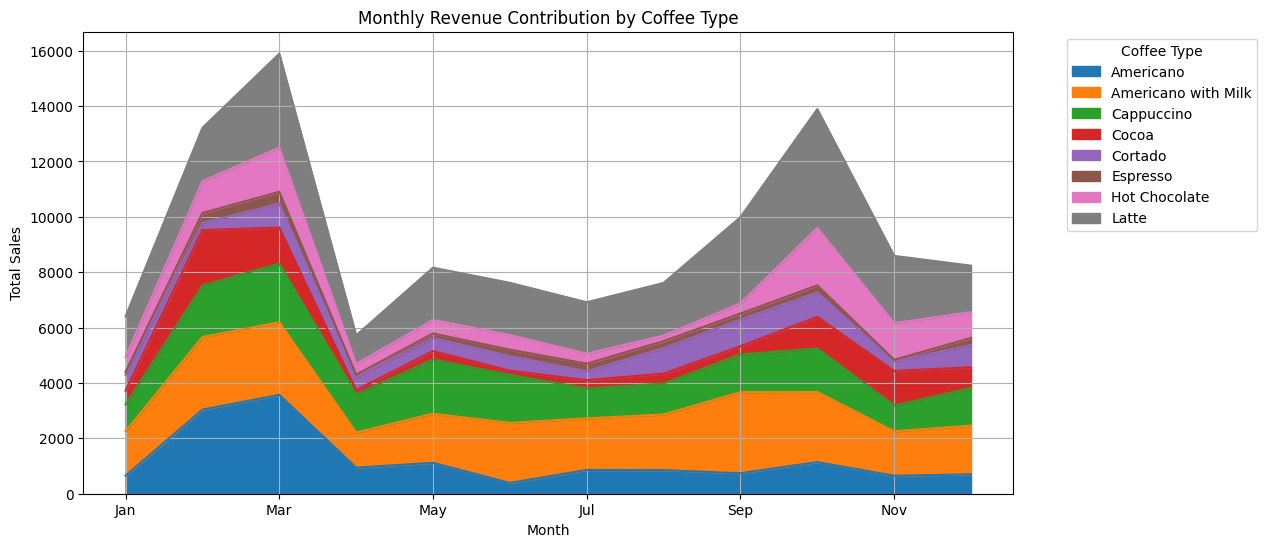

In [ ]:
coffee_month_sales = (
    df.groupby(["Month_name", "coffee_name"])["money"].sum().reset_index()
)

plt.figure(figsize=(12, 6))
coffee_pivot = coffee_month_sales.pivot(
    index="Month_name", columns="coffee_name", values="money"
).fillna(0)
coffee_pivot.plot(kind="area", stacked=True, figsize=(12, 6))
plt.title("Monthly Revenue Contribution by Coffee Type")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Coffee Type", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

### The below graph is not good as we have 2 y axis. If we want to continue with this approacg we will need to find a different way of presentation based on her slides for multiple axises. Assitionally we would to have coffee name on the y axis and the Total sales on x 

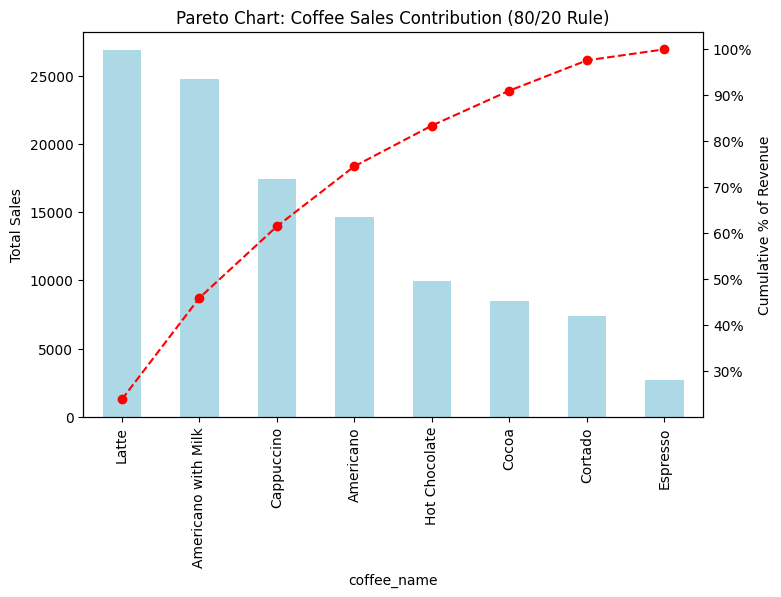

In [ ]:
# Pareto Chart (80/20 analysis)
product_sales = df.groupby("coffee_name")["money"].sum().sort_values(ascending=False)
cum_percent = product_sales.cumsum() / product_sales.sum() * 100

fig, ax1 = plt.subplots(figsize=(8, 5))
product_sales.plot(kind="bar", color="lightblue", ax=ax1)
ax2 = ax1.twinx()
ax2.plot(cum_percent.values, color="red", marker="o", linestyle="--")
ax2.yaxis.set_major_formatter("{:.0f}%".format)
plt.title("Pareto Chart: Coffee Sales Contribution (80/20 Rule)")
ax1.set_ylabel("Total Sales")
ax2.set_ylabel("Cumulative % of Revenue")
plt.show()

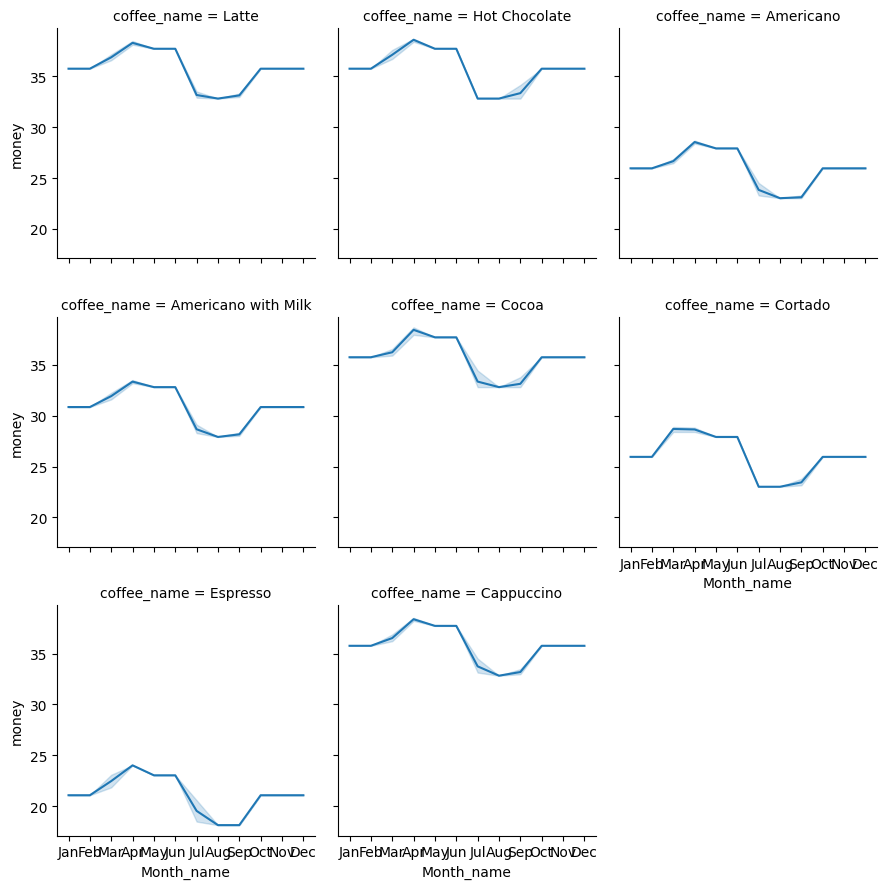

In [ ]:
# sales trends for each coffee
g = sns.FacetGrid(df, col="coffee_name", col_wrap=3, height=3)
g.map_dataframe(sns.lineplot, x="Month_name", y="money")

Text(0.5, 1.0, 'Coffee Popularity vs. Revenue')

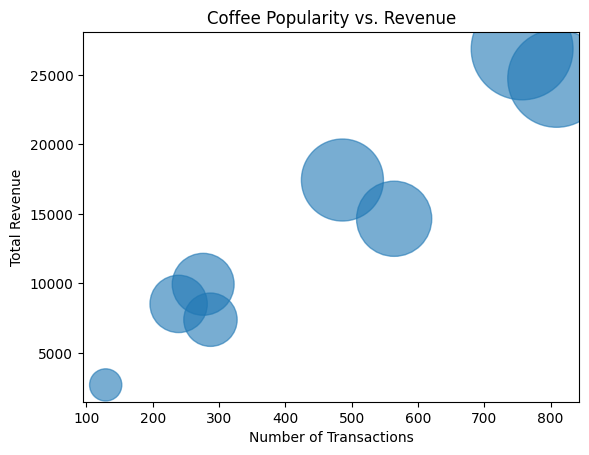

In [ ]:
# Each bubble = coffee type; X = average price, Y = sales count, Size = revenue.

coffee_summary = (
    df.groupby("coffee_name").agg({"money": "sum", "Date": "count"}).reset_index()
)
plt.scatter(
    coffee_summary["Date"],
    coffee_summary["money"],
    s=coffee_summary["money"] / 5,
    alpha=0.6,
)
plt.xlabel("Number of Transactions")
plt.ylabel("Total Revenue")
plt.title("Coffee Popularity vs. Revenue")